In [100]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import plot_utils

In [101]:
# make sure to have converted the logs using the convert.py script
# here, we access logs in the converted folder:
# - "converted/saga_p0_runs_bs1_lr1e-02/{run}/train_data.pkl"
# - "converted/svrg_p0.1_runs_bs1_lr1e-02/{run}/train_data.pkl"
# - "converted/sgd_runs_bs1_lr1e-02/{run}/train_data.pkl"

num_runs = 5 # number of runs per experiment

results_saga = [] # logs of SAGA, indexed by run
for run in range(num_runs):
    pickled_data = open(f"converted/saga_p1_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_saga.append(pickle.load(pickled_data))

results_svrg = [] # logs of SVRG, indexed by run
for run in range(num_runs):
    pickled_data = open(f"converted/svrg_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_svrg.append(pickle.load(pickled_data))

results_sgd = [] # logs of SGD, indexed by run
for run in range(num_runs):
    pickled_data = open(f"converted/sgd_runs_bs1_lr1e-02/{run}/train_data.pkl", "rb")
    results_sgd.append(pickle.load(pickled_data))

### Training loss

In [102]:
key = "train" # field of interest

# import field of interest from runs of SAGA
saga = [] # logs of SAGA, indexed by run
for run in range(num_runs):
    saga.append(results_saga[run][key])
saga = np.array(saga)[::,::,-1:].reshape([num_runs, len(saga[0])])

# import field of interest from runs of SVRG
svrg = [] # logs of SVRG, indexed by run
for run in range(num_runs):
    svrg.append(results_svrg[run][key])
svrg = np.array(svrg)[::,::,-1:].reshape([num_runs, len(svrg[0])])

# import field of interest from runs of SGD
sgd = [] # logs of SGD, indexed by run
for run in range(num_runs):
    sgd.append(results_sgd[run][key])
sgd = np.array(sgd)[::,::,-1:].reshape([num_runs, len(sgd[0])])

In [103]:
# for SAGA, SVRG, SGD, compute average, standard deviation, and confidence interval (given by the formula: mean+-(1.96*std) ) over runs

mean_saga = np.mean(saga, axis=0)
std_saga = np.std(saga, axis=0)
ci_low_saga, ci_up_saga = mean_saga - 1.96*std_saga/np.sqrt(num_runs), mean_saga + 1.96*std_saga/np.sqrt(num_runs)

mean_svrg = np.mean(svrg, axis=0)
std_svrg = np.std(svrg, axis=0)
ci_low_svrg, ci_up_svrg = mean_svrg - 1.96*std_svrg/np.sqrt(num_runs), mean_svrg + 1.96*std_svrg/np.sqrt(num_runs)

mean_sgd = np.mean(sgd, axis=0)
std_sgd = np.std(sgd, axis=0)
ci_low_sgd, ci_up_sgd = mean_sgd - 1.96*std_sgd/np.sqrt(num_runs), mean_sgd + 1.96*std_sgd/np.sqrt(num_runs)

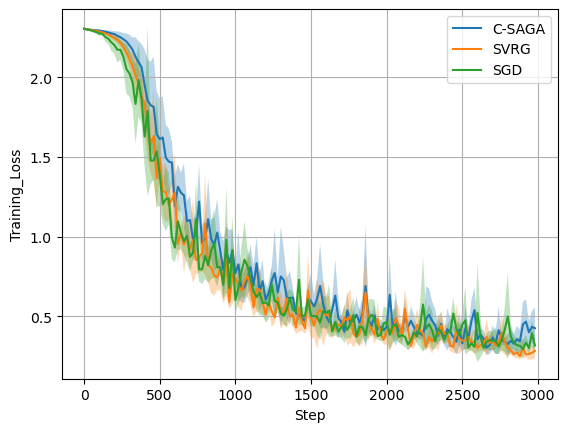

In [104]:
ratio = False # set to true to plot ratio of train loss of SAGA/SGD and SVRG/SGD
steps_loss = 20 * np.array(list(range(150))) # we measure the train loss once in 20 steps out of 3000 total, used for x axis

if ratio:
    mean_sgd = mean_sgd + 0.00000001

    ratio_saga_sgd = mean_saga/mean_sgd
    ratio_svrg_sgd = mean_svrg/mean_sgd

    plt.plot(steps_loss, ratio_saga_sgd, label = "C-SAGA")
    plt.plot(steps_loss, ratio_svrg_sgd, label = "SVRG")

    print(np.mean(ratio_saga_sgd), np.mean(ratio_svrg_sgd))

    plt.xlabel('Step')
    plt.ylabel('Training_Loss / Training_Loss_SGD')
else:
    plt.plot(steps_loss, mean_saga, label = "C-SAGA")
    plt.fill_between(steps_loss, ci_low_saga, ci_up_saga, alpha = 0.3)

    plt.plot(steps_loss, mean_svrg, label = "SVRG")
    plt.fill_between(steps_loss, ci_low_svrg, ci_up_svrg, alpha = 0.3)

    plt.plot(steps_loss, mean_sgd, label = "SGD")
    plt.fill_between(steps_loss, ci_low_sgd, ci_up_sgd, alpha = 0.3)

    plt.xlabel('Step')
    plt.ylabel('Training_Loss')


plt.legend()
plt.grid()
plt.show()

### Variance

In [105]:
key_var = "variances" # field of interest
key_var_sgd = "variances_sgd" # field of interest

# import field of interest from runs of SAGA
saga = [] # variance logs of SAGA, indexed by run
saga_sgd = [] # SGD-variance logs of SAGA, indexed by run
for run in range(num_runs):
    saga.append(results_saga[run][key_var])
    saga_sgd.append(results_saga[run][key_var_sgd])
saga = np.array(saga)[::,::,-1:].reshape([num_runs, len(saga[0])])
saga_sgd = np.array(saga_sgd)[::,::,-1:].reshape([num_runs, len(saga_sgd[0])])+0.000000001

# import field of interest from runs of SAGA
svrg = [] # variance logs of SAGA, indexed by run
svrg_sgd = [] # SGD-variance logs of SAGA, indexed by run
for run in range(num_runs):
    svrg.append(results_svrg[run][key_var])
    svrg_sgd.append(results_svrg[run][key_var_sgd])
svrg = np.array(svrg)[::,::,-1:].reshape([num_runs, len(svrg[0])])
svrg_sgd = np.array(svrg_sgd)[::,::,-1:].reshape([num_runs, len(svrg_sgd[0])])+0.000000001

In [106]:
saga = saga/saga_sgd # ratio of variances SVRG/SGD
svrg = svrg/svrg_sgd # ratio of variances SVRG/SGD

# for SAGA, SVRG compute average, standard deviation, and confidence interval (given by the formula: mean+-(1.96*std) ) over runs

mean_saga = np.mean(saga, axis=0)
std_saga = np.std(saga, axis=0)

ci_low_saga, ci_up_saga = mean_saga - 1.96*std_saga/np.sqrt(num_runs), mean_saga + 1.96*std_saga/np.sqrt(num_runs)

mean_svrg = np.mean(svrg, axis=0)
std_svrg = np.std(svrg, axis=0)

ci_low_svrg, ci_up_svrg = mean_svrg - 1.96*std_svrg/np.sqrt(num_runs), mean_svrg + 1.96*std_svrg/np.sqrt(num_runs)

0.9778943016080279 0.9684434909896998


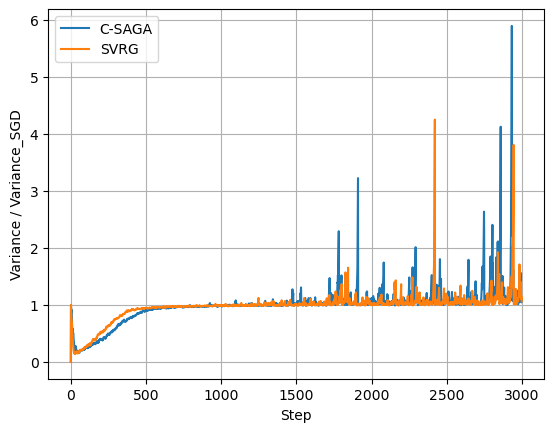

In [107]:
step_var =  np.array(list(range(3000))) # we measure the variance every step for 3000 total, used for x axis

smooth = False # remove spikes
ci = False # plot confidence interval

if smooth:
    smoothed_data, buckets = plot_utils.smoothen(mean_saga, 100)
    plt.plot(buckets, smoothed_data, label = "C-SAGA")
    smoothed_data, buckets = plot_utils.smoothen(mean_svrg, 100)
    plt.plot(buckets, smoothed_data, label = "SVRG")
else:
    plt.plot(step_var, mean_saga, label = "C-SAGA")
    if ci:
        plt.fill_between(step_var, ci_low_saga, ci_up_saga, alpha = 0.3)
    plt.plot(step_var, mean_svrg, label = "SVRG")
    if ci:
        plt.fill_between(step_var, ci_low_svrg, ci_up_svrg, alpha = 0.3)

print(np.mean(mean_saga), np.mean(mean_svrg))

plt.xlabel('Step')
plt.ylabel('Variance / Variance_SGD')
plt.legend()
plt.grid()
plt.show()

### Distances from last snapshot

In [108]:
key_dist = "snap_distances" # field of interest

# import field of interest from runs of SAGA
saga = [] # indexed by run
for run in range(num_runs):
    saga.append(results_saga[run][key_dist])
saga = np.array(saga)[::,::,-1:].reshape([num_runs, len(saga[0])])

# import field of interest from runs of SVRG
svrg = [] # indexed by run
for run in range(num_runs):
    svrg.append(results_svrg[run][key_dist])
svrg = np.array(svrg)[::,::,-1:].reshape([num_runs, len(svrg[0])])

In [109]:
# for SAGA, SVRG compute average, standard deviation, and confidence interval (given by the formula: mean+-(1.96*std) ) over runs

mean_saga = np.mean(saga, axis=0)
std_saga = np.std(saga, axis=0)

ci_low_saga, ci_up_saga = mean_saga - 1.96*std_saga/np.sqrt(num_runs), mean_saga + 1.96*std_saga/np.sqrt(num_runs)

mean_svrg = np.mean(svrg, axis=0)
std_svrg = np.std(svrg, axis=0)

ci_low_svrg, ci_up_svrg = mean_svrg - 1.96*std_svrg/np.sqrt(num_runs), mean_svrg + 1.96*std_svrg/np.sqrt(num_runs)

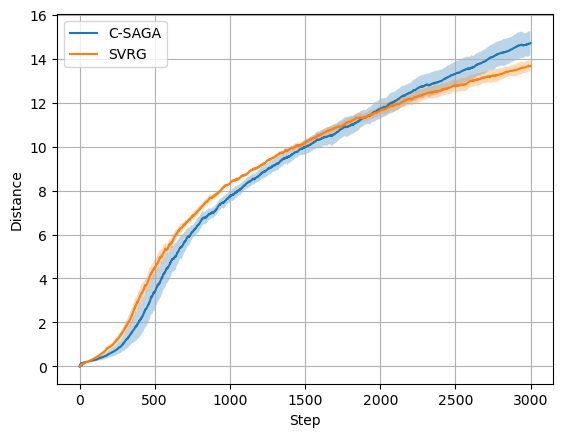

In [110]:
step_dist =  np.array(list(range(3000))) # we measure the variance every step for 3000 total, used for x axis

smooth = False # remove spikes

if smooth:
    smoothed_data, buckets = plot_utils.smoothen(mean_saga, 100)
    plt.plot(buckets, smoothed_data, label = "C-SAGA")
    smoothed_data, buckets = plot_utils.smoothen(mean_svrg, 100)
    plt.plot(buckets, smoothed_data, label = "SVRG")
else:
    plt.plot(step_dist, mean_saga, label = "C-SAGA")
    plt.fill_between(step_dist, ci_low_saga, ci_up_saga, alpha = 0.3)
    plt.plot(step_dist, mean_svrg, label = "SVRG")
    plt.fill_between(step_dist, ci_low_svrg, ci_up_svrg, alpha = 0.3)

plt.xlabel('Step')
plt.ylabel('Distance')
plt.legend()
plt.grid()
plt.show()

### Distance between iterates

In [111]:
key_dist = "distances" # field of interest

# import field of interest from runs of SAGA
saga = [] # indexed by run
for run in range(num_runs):
    saga.append(results_saga[run][key_dist])
saga = np.array(saga)[::,::,-1:].reshape([num_runs, len(saga[0])])

# import field of interest from runs of SVRG
svrg = [] # indexed by run
for run in range(num_runs):
    svrg.append(results_svrg[run][key_dist])
svrg = np.array(svrg)[::,::,-1:].reshape([num_runs, len(svrg[0])])

# import field of interest from runs of SGD
sgd = [] # indexed by run
for run in range(num_runs):
    sgd.append(results_sgd[run][key_dist])
sgd = np.array(sgd)[::,::,-1:].reshape([num_runs, len(sgd[0])])

In [112]:
# for SAGA, SVRG, SGD compute average, standard deviation, and confidence interval (given by the formula: mean+-(1.96*std) ) over runs

mean_saga = np.mean(saga, axis=0)
std_saga = np.std(saga, axis=0)

ci_low_saga, ci_up_saga = mean_saga - 1.96*std_saga/np.sqrt(num_runs), mean_saga + 1.96*std_saga/np.sqrt(num_runs)

mean_svrg = np.mean(svrg, axis=0)
std_svrg = np.std(svrg, axis=0)

ci_low_svrg, ci_up_svrg = mean_svrg - 1.96*std_svrg/np.sqrt(num_runs), mean_svrg + 1.96*std_svrg/np.sqrt(num_runs)

mean_sgd = np.mean(sgd, axis=0)
std_sgd = np.std(sgd, axis=0)

ci_low_sgd, ci_up_sgd = mean_sgd - 1.96*std_sgd/np.sqrt(num_runs), mean_sgd + 1.96*std_sgd/np.sqrt(num_runs)

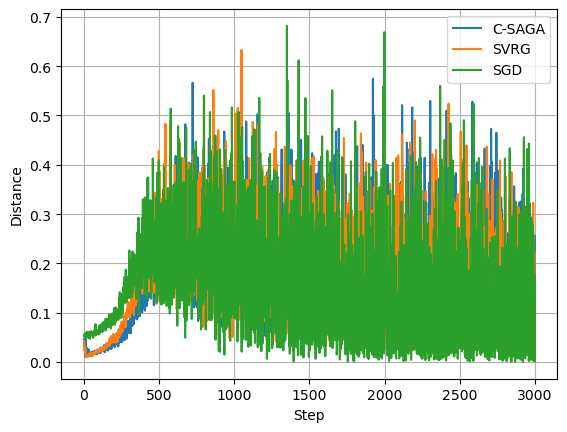

In [113]:
step_dist =  np.array(list(range(3000))) # we measure the variance every step for 3000 total, used for x axis

smooth = False # remove spikes
ci = False # plot confidence interval

if smooth:
    smoothed_data, buckets = plot_utils.smoothen(mean_saga, 100)
    plt.plot(buckets, smoothed_data, label = "C-SAGA")
    smoothed_data, buckets = plot_utils.smoothen(mean_svrg, 100)
    plt.plot(buckets, smoothed_data, label = "SVRG")
    smoothed_data, buckets = plot_utils.smoothen(mean_sgd, 100)
    plt.plot(buckets, smoothed_data, label = "SGD")
else:
    plt.plot(step_dist, mean_saga, label = "C-SAGA")
    if ci:
        plt.fill_between(step_dist, ci_low_saga, ci_up_saga, alpha = 0.3)
    plt.plot(step_dist, mean_svrg, label = "SVRG")
    if ci:
        plt.fill_between(step_dist, ci_low_svrg, ci_up_svrg, alpha = 0.3)
    plt.plot(step_dist, mean_sgd, label = "SGD")
    if ci:
        plt.fill_between(step_dist, ci_low_sgd, ci_up_sgd, alpha = 0.3)

plt.xlabel('Step')
plt.ylabel('Distance')
plt.legend()
plt.grid()
plt.show()